Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **25 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Simon Andren"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Deterministic Quicksort

## Question 1 [time estimate: 5 minutes]

Using Figure 7.1 in Cormen et al. as a model, perform manually the partition process on the following list: A = [1,5,6,2,3,8,9,4,7]. You just need to specify the followings:
1. The array after the process is done.
2. The value of $i$ after the process is done.

After 1st process:
[1,5,6,2,3,4,7,9,8] - i+1 = 6


After 2st process:

[1,2,3,4,5,6] - i+1 = 3

[8,9] - i+1 = 1


After 3rd process:

[1,2,3] - i+1 = 2

[5,6] - i+1 = 1

[9]

[]


After 4th process:

[1,2] - i+1 = 1

[]

[5] 

[]


After 4th process:

[1] 

[]


## Question 2 [time estimate: 7 minutes]

Code up a Python implementation of `partition(A, p, r)`, closely follow the pseudo-code in Cormen et al., p.172. Your function should return the index of the pivot in the array.

In [2]:
def partition(A,p,r):
    """
    Assume r<len(A) and p>=0
    """
    
    x = A[r] #Define the pivot
    i = p - 1 #define the end of the left array
    
    for j in range(p, r): #loop through each element in the arrray excluding r
        
        if A[j] <= x: #If the jth element in smaller or equal to x
            i += 1 #Move the end of the left array 1 step forward
            A[i], A[j] = A[j], A[i] #Swap the jth element with ith element to make all the right array elements larger than the pivot
    
    A[i+1], A[r] = A[r], A[i+1] #Swap the pivot to the start of the right array
    
    return i+1
    raise NotImplementedError()

In [3]:
A = [1,5,6,2,3,8,9,4,7]
assert(partition(A, 0, len(A)-1)==6)

## Question 3 [time estimate: 3 minutes]

Code up your own Python implementation of `quicksort(A, p, r)`, using `partition(A,p,r)`.

In [4]:
def quick_sort(A,p,r):
    
    if p < r: #If the array has mos than 1 element
        
        q = partition(A, p, r) #Divide and sort into two arrays and return the pivot index 
        quick_sort(A, p, q-1) #calls quick_sort on the left array
        quick_sort(A, q+1, r) #calls quick_sort on the right array
        
    return A
    raise NotImplementedError()

A = [1,5,6,2,3,8,9,4,7]
quick_sort(A, 0, len(A)-1)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [5]:
A = [0]
assert(quick_sort(A, 0, 0) == [0])
A = [3,1,2]
assert(quick_sort(A, 0, 2) == [1,2,3])

## Question 4 [time estimate: 10 minutes] 

Explain (using experimental plots) the running time of `quick_sort` when: 
1. all elements of array A have the same value (e.g., [1,1,1])?
2. array A contains distinct elements sorted in decreasing order (e.g., [5,4,2,1])?


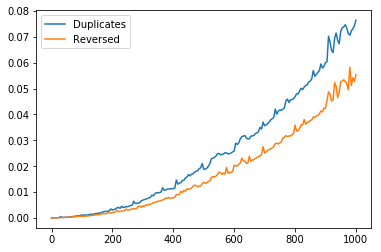

In [7]:
import time
import matplotlib.pyplot as plt

runtime_lst_dup = []
runtime_lst_rev = []
n_lst = []

for i in range(0,1001,5):
    dup_lst = [1 for x in range(1, i+1)]
    reverse_lst = [x for x in range(i, 0, -1)]
    
    str_time = time.time()
    quick_sort(dup_lst,0,len(dup_lst)-1)
    runtime_lst_dup.append(time.time()-str_time)
    
    str_time = time.time()
    quick_sort(reverse_lst,0,len(reverse_lst)-1)
    runtime_lst_rev.append(time.time()-str_time)
    
    n_lst.append(i)


plt.plot(n_lst, runtime_lst_dup, label = "Duplicates")
plt.plot(n_lst, runtime_lst_rev, label = "Reversed")

plt.legend()

plt.show()



#raise NotImplementedError()

Both the completely sorted and the duplicate list has bad runtime and could be considered worst case runtimes. This is because the pivot would not be able to sufficently split the array. However, it appears that the dublicates result in the even worse runtime, for a reason I don't understand. I though that in both cases, the pivot would end up spliting the arrays in to two array, 0 and n-1, and such that the depth would be equal in both scenarios with n being the runtime for each level. Such big-oh$(n^2)$